In [28]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from keras.utils.np_utils import to_categorical # for one-hot encodeing for multi-class datasets
import random

In [29]:
np.random.seed(0)

In [30]:
(X_train, y_train),(X_test, y_test) = mnist.load_data() 
#load 60k mnist images in training with their associated label and 10k for testing wiht their labels. 

In [31]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)


In [32]:
assert(X_train.shape[0] == y_train.shape[0]), " The number of images is not equal to the number of labels." 
assert(X_test.shape[0] == y_test.shape[0]), " The number of images is not equal to the number of labels." 
assert(X_train.shape[1:] == (28,28)), " The dimensions of the images are not 28x28"
assert(X_test.shape[1:] == (28,28)), " The number of images is not equal to the number of labels."  
# if condition is met code continues if not it will throw an error with a specific message. 

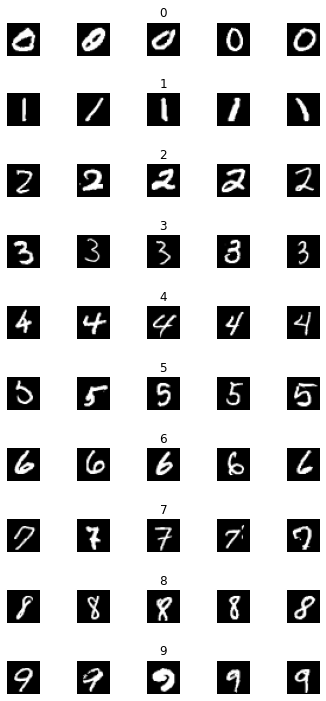

In [33]:
from matplotlib.cm import get_cmap
num_of_samples = []

cols = 5
num_classes = 10

fig, axs = plt.subplots(nrows = num_classes, ncols = cols, figsize = (5,10))
fig.tight_layout() # minimizing overlapping of plots

# for to iterate all in colunmn by column
# showing images in the grid
for i in range(cols):
  for j in range(num_classes):
    x_selected = X_train[y_train == j]
    axs[j][i].imshow(x_selected[random.randint(0,len(x_selected-1)),:,:], cmap = plt.get_cmap("gray"))
    axs[j][i].axis("off")
    if i == 2:
      axs[j][i].set_title(str(j))
      num_of_samples.append(len(x_selected))

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


Text(0, 0.5, ' Number of images')

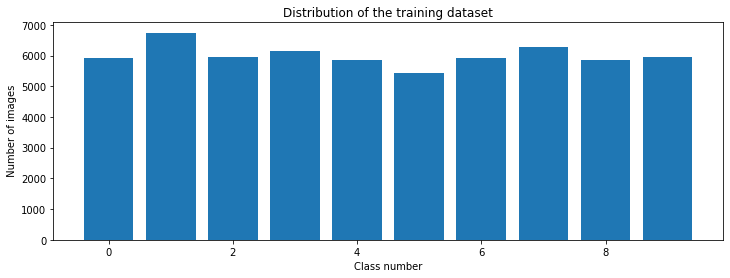

In [34]:
print(num_of_samples)# number of images in each class
plt.figure(figsize = (12,4))
plt.bar(range(0,num_classes), num_of_samples)
plt.title("Distribution of the training dataset")
plt.xlabel("Class number")
plt.ylabel(" Number of images")

In [35]:
# one-hot encoding our data labels by using to_categorical
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test,10)


In [36]:
# normalize data to max pixel value of 255 is 1, and lowest is 0. 
# all pixels values between 0 and 1. 
X_train = X_train/255
X_test = X_test/255

In [37]:
# flattening of our images. (making images one-dimensional)
num_pixels = 784 # total number of pixel in each image. 
X_train = X_train.reshape(X_train.shape[0],num_pixels)
X_test = X_test.reshape(X_test.shape[0],num_pixels)

print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [38]:
def create_model():
  model = Sequential()
  model.add(Dense(10,input_dim= num_pixels, activation = 'relu'))
  model.add(Dense(10,activation='relu'))
  model.add(Dense(num_classes,activation = 'softmax'))
  model.compile(Adam(learning_rate=0.01), loss = 'categorical_crossentropy', metrics = ['accuracy'])
  return model

In [39]:
model = create_model()
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 10)                7850      
                                                                 
 dense_4 (Dense)             (None, 10)                110       
                                                                 
 dense_5 (Dense)             (None, 10)                110       
                                                                 
Total params: 8,070
Trainable params: 8,070
Non-trainable params: 0
_________________________________________________________________
None


In [40]:
history = model.fit(X_train, y_train, validation_split=0.1, epochs = 10, batch_size = 200, verbose = 1, shuffle = 1)

Epoch 1/10
270/270 [==============================] - 3s 8ms/step - loss: 0.5690 - accuracy: 0.8268 - val_loss: 0.2912 - val_accuracy: 0.9170
Epoch 2/10
270/270 [==============================] - 1s 5ms/step - loss: 0.3273 - accuracy: 0.9041 - val_loss: 0.2490 - val_accuracy: 0.9270
Epoch 3/10
270/270 [==============================] - 1s 4ms/step - loss: 0.2998 - accuracy: 0.9126 - val_loss: 0.2487 - val_accuracy: 0.9265
Epoch 4/10
270/270 [==============================] - 1s 4ms/step - loss: 0.2812 - accuracy: 0.9179 - val_loss: 0.2331 - val_accuracy: 0.9338
Epoch 5/10
270/270 [==============================] - 1s 4ms/step - loss: 0.2739 - accuracy: 0.9195 - val_loss: 0.2531 - val_accuracy: 0.9257
Epoch 6/10
270/270 [==============================] - 1s 4ms/step - loss: 0.2662 - accuracy: 0.9203 - val_loss: 0.2277 - val_accuracy: 0.9325
Epoch 7/10
270/270 [==============================] - 1s 4ms/step - loss: 0.2563 - accuracy: 0.9251 - val_loss: 0.2355 - val_accuracy: 0.9307
Epoch 

Text(0.5, 0, 'epoch')

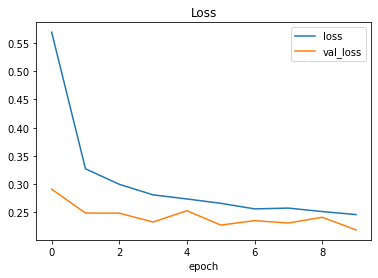

In [41]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss','val_loss'])
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

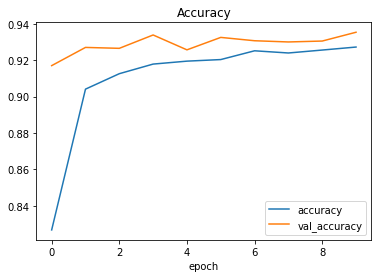

In [42]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy','val_accuracy'])
plt.title('Accuracy')
plt.xlabel('epoch')

In [43]:
# for test data
score = model.evaluate(X_test, y_test, verbose = 0)
print("Test score:", score[0])
print("Test accuracy:", score[1])

Test score: 0.2722143530845642
Test accuracy: 0.9204000234603882


<Response [200]>


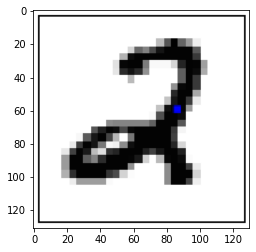

In [44]:
import requests 
from PIL import Image
url = 'https://colah.github.io/posts/2014-10-Visualizing-MNIST/img/mnist_pca/MNIST-p1815-4.png'
response = requests.get(url, stream = True)
print(response)
img = Image.open(response.raw)
plt.imshow(img)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0 210]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0 210]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0 210]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  67 170
  254 155 100  17   0   0   0   0   0 210]
 [  0   0   0   0   0   0   0   0   0   0   0  18  89 176 155 198 239 252
  252 252 252 174   0   0   0   0   0 209]
 [  0   0   0   0   0   0   0   0   0   0  27 234 251 252 142  28  28  28
   62 222 252 246  87   0   0   0   0 210]
 [  0   0   0   0   0   0   0   0   0   0  28 228 243 229 119   2   2   2
   18 185 252 247  88   0   0   0   0 210]
 [  0   0   0   0   0   0   0   0   0   0   0   0  69   0   0   

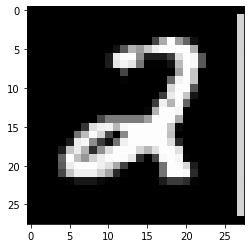

In [46]:
import cv2
img_array = np.asarray(img)
resized = cv2.resize(img_array,(28,28)) # resizing image to 28x28 pixels. 
gray_scale = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
image = cv2.bitwise_not(gray_scale)
plt.imshow(image, cmap=plt.get_cmap("gray"))
print(image)

In [47]:
image = image/255
image = image.reshape(1,784)

In [50]:
prediction =  pred_func = np.argmax(model.predict(image), axis=-1)
print("Predicted digit:",str(prediction))

1/1 [==============================] - 0s 34ms/step
Predicted digit: [2]
